In [27]:
import pandas as pd
import requests
import json
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

In [71]:
with open('recipes_dict.json', 'r') as file:
    recipes_dict = json.loads(file.read())

#### Transform dictionary into a DataFrame

In [72]:
recipes_df = pd.DataFrame.from_dict(recipes_dict, orient='columns', dtype=None).T.fillna(0)
recipes_df

,Almond,Anchovy,Anise,Apple,Apple Juice,Apricot,Artichoke,Arugula,Asian Pear,Asparagus,...,cooking_time,date,make_it_again,protein,rating,reviews_count,serving,sodium,turkey,url
"""Antipasto"" Pasta with Sausage, Artichoke Hearts, and Sun-Dried Tomatoes",0,0,0,0,0,0,1,0,0,0,...,25,November 2017,0.00,26,0.0,0,4,974,0,https://www.epicurious.com/recipes/food/views/...
"""Bloody Mary"" Tomato Toast with Celery and Horseradish",0,0,0,0,0,0,0,0,0,0,...,15,July 2015,1.00,2,4.0,2,6,344,0,https://www.epicurious.com/recipes/food/views/...
"""Bow-Tie"" Pasta with Zucchini",0,0,0,0,0,0,0,0,0,0,...,0,July 1999,0.93,17,3.5,48,4,759,0,https://www.epicurious.com/recipes/food/views/...
"""Cromlet"" With Wilted Greens and Fennel and Olive Salad",0,0,0,0,0,0,0,0,0,0,...,0,February 2017,1.00,24,4.0,1,2,913,0,https://www.epicurious.com/recipes/food/views/...
"""Nextover"" Chicken Tacos with Quick Refried Beans",0,0,0,0,0,0,0,0,0,0,...,20,January 2017,0.67,65,3.0,3,2,1632,0,https://www.epicurious.com/recipes/food/views/...
"""No Nightmare"" Beef Wellington",0,0,0,0,0,0,0,0,0,0,...,0,August 2008,0.71,0,3.5,15,0,0,0,https://www.epicurious.com/recipes/food/views/...
"""Pizza"" Sandwiches",0,0,0,0,0,0,0,1,0,0,...,0,September 2009,1.00,34,3.0,5,4,1828,0,https://www.epicurious.com/recipes/food/views/...
"""Tomato Time"" Tart",0,0,0,0,0,0,0,0,0,0,...,0,August 2002,0.75,0,3.0,4,0,0,0,https://www.epicurious.com/recipes/food/views/...
"'Wichcraft's Roasted Turkey, Avocado, Bacon, Onion Relish, & Aïoli on Ciabatta",0,0,0,0,0,0,0,0,0,0,...,0,December 2006,1.00,55,4.0,20,4,1291,1,https://www.epicurious.com/recipes/food/views/...
10-Minute Chicken Flatbreads with Hummus and Yogurt,0,0,0,0,0,0,0,0,0,0,...,10,August 2017,0.83,35,3.5,6,4,917,0,https://www.epicurious.com/recipes/food/views/...


In [73]:
recipes_df['calories'] = recipes_df[['calories']].apply(pd.to_numeric)
recipes_df['carbohydrates'] = recipes_df[['carbohydrates']].apply(pd.to_numeric)
recipes_df['protein'] = recipes_df[['protein']].apply(pd.to_numeric)
recipes_df['serving'] = recipes_df[['serving']].apply(pd.to_numeric)
recipes_df['cholesterol'] = recipes_df[['cholesterol']].apply(pd.to_numeric)
recipes_df['sodium'] = recipes_df[['sodium']].apply(pd.to_numeric)

In [147]:
cooking_time = [x for x in recipes_df['cooking_time']]
cooking_time_corrected = []
for i in cooking_time:
    try:
        i = int(i)
        if i < 7:
            i = i * 60
    except:
        i = 0
    cooking_time_corrected.append(i)
#for i in cooking_time_corrected:
    
recipes_df['cooking_time'] = cooking_time_corrected

In [148]:
attributes = [x for x in recipes_df.columns]
len(attributes)

331

In [191]:
df_reduced = recipes_df[recipes_df.rating > 0][recipes_df.calories > 10][recipes_df.carbohydrates > 10][recipes_df.protein > 1][recipes_df.serving > 0][recipes_df.sodium > 1][recipes_df.reviews_count > 0][recipes_df.make_it_again > 0][recipes_df.date != 0][recipes_df.cooking_time > 0]
df_reduced

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Almond,Anchovy,Anise,Apple,Apple Juice,Apricot,Artichoke,Arugula,Asian Pear,Asparagus,...,cooking_time,date,make_it_again,protein,rating,reviews_count,serving,sodium,turkey,url
"""Nextover"" Chicken Tacos with Quick Refried Beans",0,0,0,0,0,0,0,0,0,0,...,20,January 2017,0.67,65,3.0,3,2,1632,0,https://www.epicurious.com/recipes/food/views/...
10-Minute Chicken Flatbreads with Hummus and Yogurt,0,0,0,0,0,0,0,0,0,0,...,10,August 2017,0.83,35,3.5,6,4,917,0,https://www.epicurious.com/recipes/food/views/...
10-Minute Sausage Skillet with Cherry Tomatoes and Broccolini,0,0,0,0,0,0,0,0,0,0,...,10,August 2017,1.00,22,4.0,11,4,1046,0,https://www.epicurious.com/recipes/food/views/...
10-Minute Shrimp with Green Beans and Creamy Lemon-Dill Dip,0,0,0,0,0,0,0,0,0,0,...,10,August 2017,1.00,30,2.5,3,4,1189,0,https://www.epicurious.com/recipes/food/views/...
3-Ingredient Cacio e Pepe (Pasta With Cheese and Pepper),0,0,0,0,0,0,0,0,0,0,...,30,July 2016,0.60,35,2.0,5,4,922,0,https://www.epicurious.com/recipes/food/views/...
3-Ingredient Creamy Pumpkin Pasta,0,0,0,0,0,0,0,0,0,0,...,25,September 2016,1.00,17,3.0,1,4,508,0,https://www.epicurious.com/recipes/food/views/...
"3-Ingredient Grilled Steak, Pineapple, and Avocado Salad",0,0,0,0,0,0,0,0,0,0,...,35,June 2017,1.00,47,4.0,3,4,838,0,https://www.epicurious.com/recipes/food/views/...
3-Ingredient Ice Cream French Toast,0,0,0,0,0,0,0,0,0,0,...,20,May 2016,1.00,13,4.0,1,2,414,0,https://www.epicurious.com/recipes/food/views/...
3-Ingredient Orecchiette with Sausage and Fennel,0,0,0,0,0,0,0,0,0,0,...,25,September 2016,1.00,26,4.0,6,4,603,0,https://www.epicurious.com/recipes/food/views/...
3-Ingredient Sausage Dinner With Lentils and Fennel,0,0,0,0,0,0,0,0,0,0,...,50,April 2016,1.00,27,4.0,1,4,627,0,https://www.epicurious.com/recipes/food/views/...


In [192]:
#Eliminate 
ingredients_count = df_reduced.drop(['calories', 'carbohydrates', 'protein', 'rating', 'serving', 'url', 'cholesterol','sodium', 'reviews_count', 'make_it_again', 'date', 'cooking_time','cooking_time'], axis = 1).apply(pd.value_counts).fillna(0)[1:].T
ingredients_count.columns = ['qty']
top_ingredients = ingredients_count.sort_values(by = ['qty'], ascending = False).head(200)
top_ingredients

,qty
Tomato,163.0
Chicken,151.0
Pasta,127.0
Cheese,122.0
Egg,118.0
Vegetable,117.0
Potato,113.0
Onion,105.0
Garlic,101.0
Pork,91.0


In [193]:
recipes_df_reduced = df_reduced[['calories', 'carbohydrates', 'protein', 'rating', 'serving', 'url', 'cholesterol','sodium', 'reviews_count', 'make_it_again', 'date', 'cooking_time']]
df_top_ingredients = df_reduced[top_ingredients.index]
df_top_ingredients

,Tomato,Chicken,Pasta,Cheese,Egg,Vegetable,Potato,Onion,Garlic,Pork,...,Sesame,Coffee,Port,Mussel,Orange Juice,Cod,Okra,Fig,Quinoa,Trout
"""Nextover"" Chicken Tacos with Quick Refried Beans",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10-Minute Chicken Flatbreads with Hummus and Yogurt,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10-Minute Sausage Skillet with Cherry Tomatoes and Broccolini,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10-Minute Shrimp with Green Beans and Creamy Lemon-Dill Dip,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Cacio e Pepe (Pasta With Cheese and Pepper),0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Creamy Pumpkin Pasta,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"3-Ingredient Grilled Steak, Pineapple, and Avocado Salad",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Ice Cream French Toast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Orecchiette with Sausage and Fennel,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Sausage Dinner With Lentils and Fennel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
df_pre = pd.merge(recipes_df_reduced, df_top_ingredients, left_index=True, right_index=True)
df_pre

,calories,carbohydrates,protein,rating,serving,url,cholesterol,sodium,reviews_count,make_it_again,...,Sesame,Coffee,Port,Mussel,Orange Juice,Cod,Okra,Fig,Quinoa,Trout
"""Nextover"" Chicken Tacos with Quick Refried Beans",1224,65,65,3.0,2,https://www.epicurious.com/recipes/food/views/...,292,1632,3,0.67,...,0,0,0,0,0,0,0,0,0,0
10-Minute Chicken Flatbreads with Hummus and Yogurt,463,42,35,3.5,4,https://www.epicurious.com/recipes/food/views/...,115,917,6,0.83,...,0,0,0,0,0,0,0,0,0,0
10-Minute Sausage Skillet with Cherry Tomatoes and Broccolini,476,20,22,4.0,4,https://www.epicurious.com/recipes/food/views/...,70,1046,11,1.00,...,0,0,0,0,0,0,0,0,0,0
10-Minute Shrimp with Green Beans and Creamy Lemon-Dill Dip,482,18,30,2.5,4,https://www.epicurious.com/recipes/food/views/...,230,1189,3,1.00,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Cacio e Pepe (Pasta With Cheese and Pepper),736,89,35,2.0,4,https://www.epicurious.com/recipes/food/views/...,66,922,5,0.60,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Creamy Pumpkin Pasta,694,91,17,3.0,4,https://www.epicurious.com/recipes/food/views/...,102,508,1,1.00,...,0,0,0,0,0,0,0,0,0,0
"3-Ingredient Grilled Steak, Pineapple, and Avocado Salad",902,39,47,4.0,4,https://www.epicurious.com/recipes/food/views/...,186,838,3,1.00,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Ice Cream French Toast,757,69,13,4.0,2,https://www.epicurious.com/recipes/food/views/...,175,414,1,1.00,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Orecchiette with Sausage and Fennel,500,72,26,4.0,4,https://www.epicurious.com/recipes/food/views/...,26,603,6,1.00,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Sausage Dinner With Lentils and Fennel,510,41,27,4.0,4,https://www.epicurious.com/recipes/food/views/...,25,627,1,1.00,...,0,0,0,0,0,0,0,0,0,0


Text(0,0.5,'# Recipes')

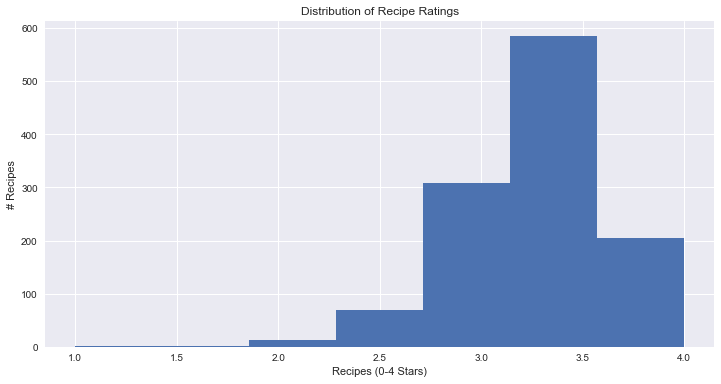

In [195]:
plt.figure(figsize=(12,6))
plt.hist(df_pre['rating'], bins = 7)
plt.title("Distribution of Recipe Ratings")
plt.xlabel('Recipes (0-4 Stars)')
plt.ylabel('# Recipes')

In [196]:
df_pre['success_score'] = df_pre['rating'] * df_pre['make_it_again']

In [197]:
with open('df_pre.pkl', 'wb') as picklefile:
    pickle.dump(df_pre, picklefile)